# Raport ze statystyki

https://www.kaggle.com/datasets/mysarahmadbhat/120-years-of-olympic-history?resource=download

In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, random, seaborn as sns, math
from scipy.stats import norm, pareto, expon, lognorm

**wykresy**

In [ ]:
plt.boxplot(X)
plt.axhline(y=cos, label = '')

**gęstośc, dytrybuanta**

In [ ]:
sns.ecdfplot(data = X, label = 'dystrybuanta empiryczna')
sns.kdeplot(X, label= 'gestość empiryczna X')
norm.pdf(np.linspace(-3,3,1000))
plt.hist(X, density = True)


**dystrybuanta empiryczna** - moja funkcja

In [19]:
def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n
def drewdemp(X,xss,yss): # dystrybuanta empiryczna + teoretyczna
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    plt.plot(x_values, y_values, label='empiryczna')
    plt.title('Wykres dystrybuant')
    plt.plot(xss, yss, label='teoretyczna')
    plt.legend()
    plt.show()

**parametry statystyczne**

In [20]:
def mediana(X):
    n = len(X)
    if n%2==0:
        s = int(n/2)
        return (sorted(X)[s]+sorted(X)[s+1])/2
    else:
        return sorted(X)[int(n/2)]

In [21]:
def Q1(X):
    s = int(len(X)/2)
    return mediana(X[0:s+1])

In [22]:
def Q2(X):
    return mediana(X)

In [23]:
def Q3(X):
    s = int(len(X)/2)
    return mediana(X[s::])

In [24]:
def rozstepZProby(X):
    return Q3(X)-Q1(X)

In [25]:
def rozMiedzykwartylowy(X):
    Y = sorted(X)
    return Y[-1] - Y[0]

In [26]:
def wariancjaZProby(X):
    n = len(X)
    return 1/(n-1)*sum((xi - sum(X)/n)**2 for xi in X)

In [27]:
def odchylenie(X):
    return math.sqrt(wariancjaZProby(X))

In [28]:
def mean(X):
    n = len(X)
    return sum(X)/n

**średnie**

In [29]:
def arytmetyczna(X):
    return mean(X)

In [30]:
def harmoniczna(X):
    return len(X)/sum(1/xi for xi in X)

In [31]:
def geometryczna(X):
    n = len(X)
    prod = 1
    for xi in X:
        prod *= xi**(1/n)
    return prod

In [32]:
def ucinana(X,k):
    n = len(X)
    Xs = sorted(X)
    return 1/(n-2*k) * sum(xi for xi in Xs[k:n-k])

In [33]:
def winsorowska(X,k):
    n = len(X)
    Xs = sorted(X)
    return 1/n * ((k+1)*Xs[k] + sum(xi for xi in Xs[k+1:n-k]) + (k+1)*Xs[n-k-1])

In [ ]:
ys1 = [ucinana(dane, k) for k in range(1,int(n/2)+1)]
ys2 = [winsorowska(dane, k) for k in range(1,int(n/2)+1)]

**korelacja kolejnościowa (rangowa)**

In [34]:
def rangi(tablica):
    n = len(tablica)
    tab = tablica.copy()
    tab.sort(reverse = True)
    r = [0]*n
    for i in range(n):
        a = tablica.count(tab[i]) 
        if not a>1:
            r[tablica.index(tab[i])] = i+1
        else:
            suma = a
            indeksy = []
            for j in range(n):
                if tab[i] == tablica[j]:
                    indeksy.append(j)
            for k in range(n):
                if tab[i] == tab[k]:
                    suma += k
            for o in indeksy:
                r[o] = suma/a
    return r

In [35]:
def spearman(tab1, tab2):
    n = len(tab1)
    return 1 - 6*sum(i**2 for i in [abs(tab1[k]-tab2[k]) for k in range(n)])/(n*(n**2-1))

In [4]:
fajne = pd.read_csv(r'C:\\Users\\Maria Nowacka\Downloads\\archive (3)\\athlete_events.csv')

In [21]:
fajne.shape

(271116, 15)

In [79]:
df = fajne.dropna()
df = df.drop_duplicates()
df.shape
age = df['Age']
height = df['Height']
weight = df['Weight']

In [97]:
df.shape

(30181, 15)

In [87]:
dd = df.drop(["ID"], axis=1)
dd = dd.drop(['Year'], axis=1)
dd = dd.drop(['Age'], axis=1)

In [88]:
dd.columns

Index(['Name', 'Sex', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Season',
       'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

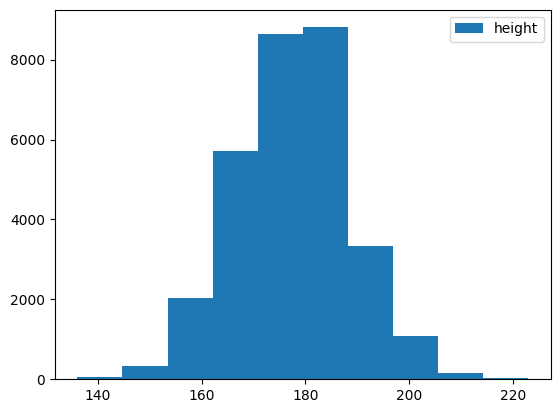

In [7]:
plt.hist(height, label = 'height')
# plt.hist(silver, label = 'silver', alpha = 0.7)
plt.legend()
plt.show()

(array([2.6600e+02, 4.2290e+03, 1.2051e+04, 9.2890e+03, 3.5110e+03,
        6.2800e+02, 1.4500e+02, 4.5000e+01, 1.2000e+01, 5.0000e+00]),
 array([ 28. ,  43.4,  58.8,  74.2,  89.6, 105. , 120.4, 135.8, 151.2,
        166.6, 182. ]),
 <BarContainer object of 10 artists>)

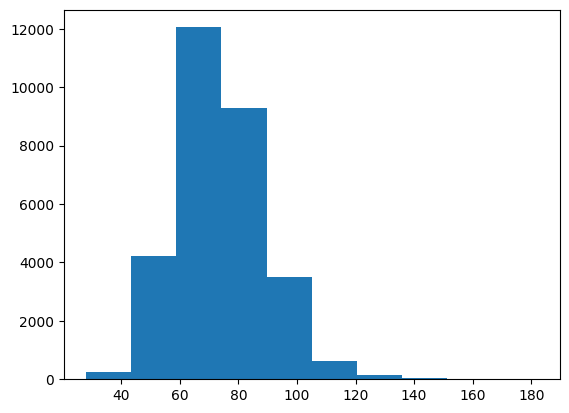

In [8]:
plt.hist(weight)

(array([1.5450e+03, 1.0006e+04, 1.1746e+04, 5.5300e+03, 9.1200e+02,
        2.7300e+02, 1.2000e+02, 3.3000e+01, 1.3000e+01, 3.0000e+00]),
 array([13. , 18.3, 23.6, 28.9, 34.2, 39.5, 44.8, 50.1, 55.4, 60.7, 66. ]),
 <BarContainer object of 10 artists>)

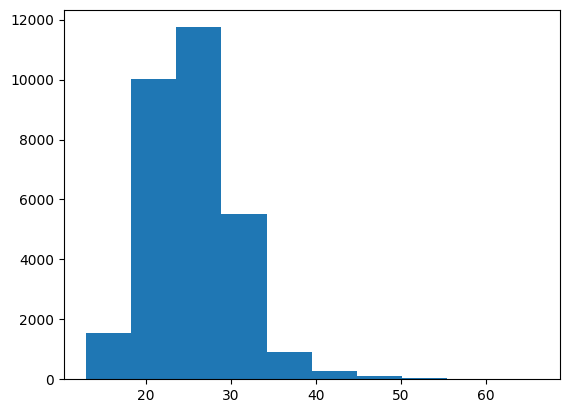

In [28]:
plt.hist(age)

(array([1.5450e+03, 1.0006e+04, 1.1746e+04, 5.5300e+03, 9.1200e+02,
        2.7300e+02, 1.2000e+02, 3.3000e+01, 1.3000e+01, 3.0000e+00]),
 array([13. , 18.3, 23.6, 28.9, 34.2, 39.5, 44.8, 50.1, 55.4, 60.7, 66. ]),
 <BarContainer object of 10 artists>)

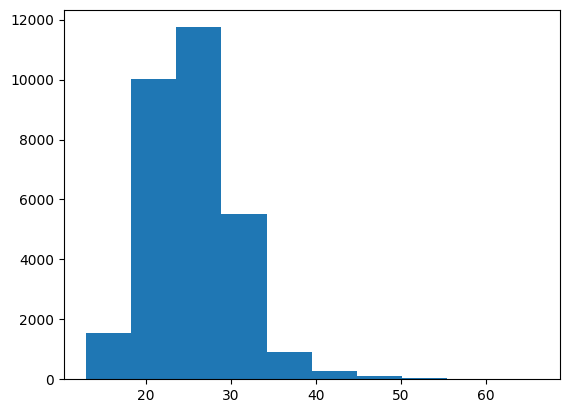

In [9]:
plt.hist(age)

In [89]:
data_cat = df.select_dtypes(exclude=np.number)
data_num = dd.select_dtypes(include=np.number)

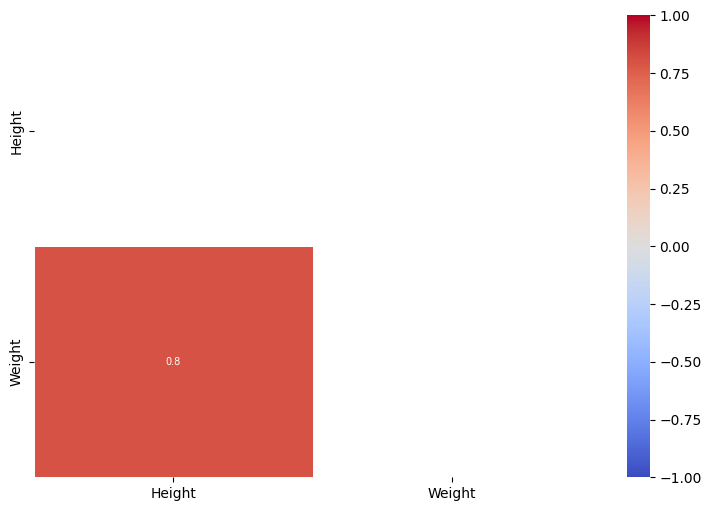

In [90]:
fig, ax = plt.subplots(figsize=(9, 6))
corr = data_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,  annot=True, square=False, linewidths=.5, 
                  annot_kws={"size": 7}, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

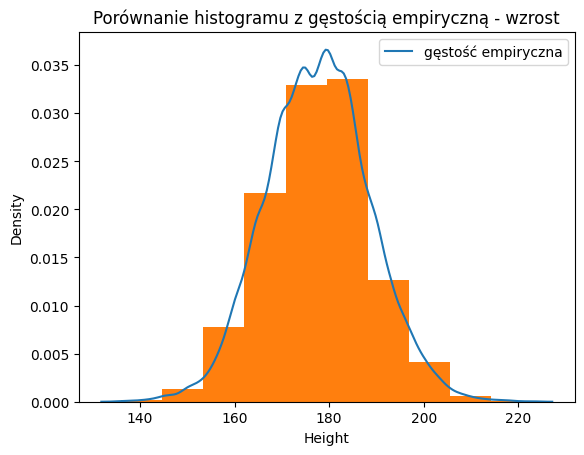

In [43]:
x = height
sns.kdeplot(x, label= 'gęstość empiryczna')
plt.hist(x, density = True)
plt.title('Porównanie histogramu z gęstością empiryczną - wzrost')
plt.legend(loc='upper right')
plt.savefig("wzrost_gestosc.png")
plt.show()

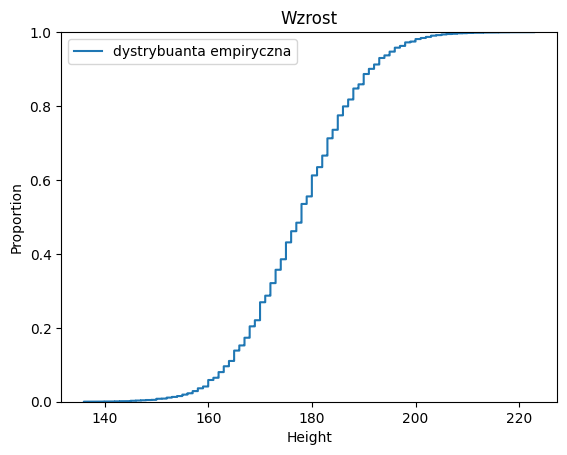

In [42]:
sns.ecdfplot(data = height, label = 'dystrybuanta empiryczna')
plt.title('Wzrost')
plt.legend()
plt.savefig('dystrybuanta_wzrost.png')

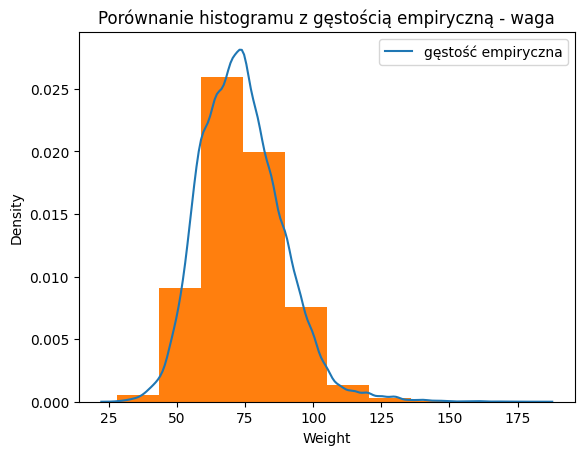

In [44]:
x = weight
sns.kdeplot(x, label= 'gęstość empiryczna')
plt.hist(x, density = True)
plt.title('Porównanie histogramu z gęstością empiryczną - waga')
plt.legend(loc='upper right')
plt.savefig("waga_gestosc.png")
plt.show()

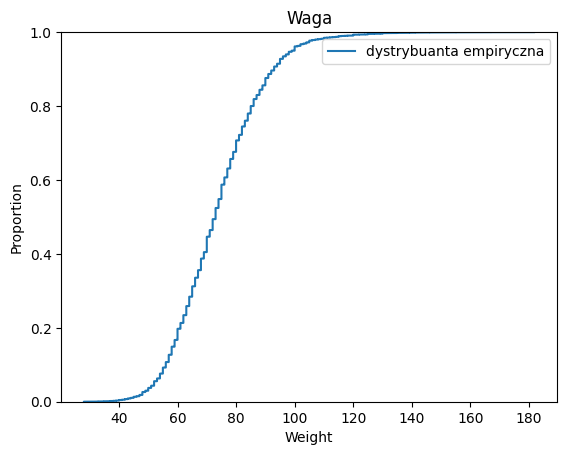

In [45]:
sns.ecdfplot(data = weight, label = 'dystrybuanta empiryczna')
plt.title('Waga')
plt.legend()
plt.savefig('dystrybuanta_waga.png')

In [50]:
X = height
mean(X), mediana(X), Q1(X), Q2(X), Q3(X), rozstepZProby(X), rozMiedzykwartylowy(X), wariancjaZProby(X), odchylenie(X)

(177.64235777475895,
 178.0,
 178.0,
 178.0,
 178.0,
 0.0,
 87.0,
 119.33789296953726,
 10.924188435281463)

In [51]:
X = weight
mean(X), mediana(X), Q1(X), Q2(X), Q3(X), rozstepZProby(X), rozMiedzykwartylowy(X), wariancjaZProby(X), odchylenie(X)

(73.75355356018687,
 73.0,
 73.0,
 73.0,
 73.0,
 0.0,
 154.0,
 225.1497823519005,
 15.00499191442303)

## średnie

In [52]:
ah = arytmetyczna(height)
hh = harmoniczna(height)
gh = geometryczna(height)
uh = ucinana(height, 15000)
wh = winsorowska(height, 15000)


In [53]:
print(f'arytmetyczna: {ah}, \nharmoniczna: {hh} \ngeometryczna: {gh} \nucinana: {uh} \nwinsorowska {wh}')

arytmetyczna: 177.64235777475895, 
harmoniczna: 176.96679659981922 
geometryczna: 177.3053568743275 
ucinana: 178.0 
winsorowska 178.0058977502402


In [56]:
aw = arytmetyczna(weight)
hw = harmoniczna(weight)
gw = geometryczna(weight)
uw = ucinana(weight, 15000)
ww = winsorowska(weight, 15000)

In [57]:
print(f'arytmetyczna: {aw}, \nharmoniczna: {hw} \ngeometryczna: {gw} \nucinana: {uw} \nwinsorowska {ww}')

arytmetyczna: 73.75355356018687, 
harmoniczna: 70.80549004062173 
geometryczna: 72.27155407111562 
ucinana: 73.0 
winsorowska 73.00241874026705


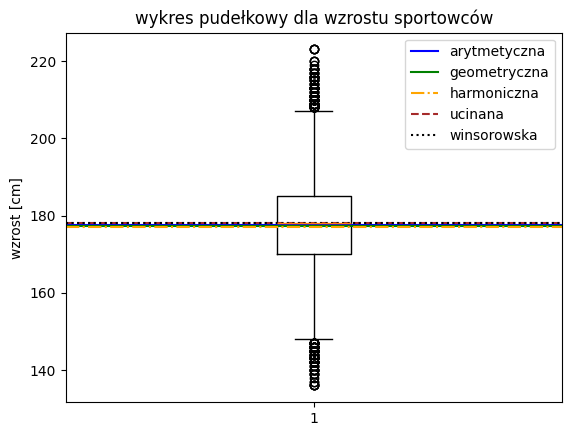

In [95]:
plt.boxplot(height)
plt.axhline(y=ah, label = 'arytmetyczna', c ='b')
plt.axhline(y=gh, label = 'geometryczna', c = 'g', linestyle = '-')
plt.axhline(y=hh, label = 'harmoniczna', c = 'orange', linestyle = '-.')
plt.axhline(y=uh, label = 'ucinana', c = 'brown', ls = '--')
plt.axhline(y=wh, label = 'winsorowska', c = 'black', ls = ':')
plt.title('wykres pudełkowy dla wzrostu sportowców')
plt.ylabel('wzrost [cm]')
plt.legend()
plt.savefig('boxplot_wzrost.png')

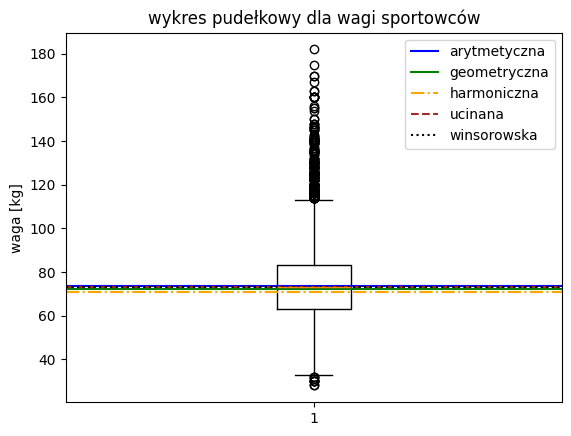

In [96]:
plt.boxplot(weight)
plt.axhline(y=aw, label = 'arytmetyczna', c ='b')
plt.axhline(y=gw, label = 'geometryczna', c = 'g', linestyle = '-')
plt.axhline(y=hw, label = 'harmoniczna', c = 'orange', linestyle = '-.')
plt.axhline(y=uw, label = 'ucinana', c = 'brown', ls = '--')
plt.axhline(y=ww, label = 'winsorowska', c = 'black', ls = ':')
plt.title('wykres pudełkowy dla wagi sportowców')
plt.ylabel('waga [kg]')
plt.legend()
plt.savefig('boxplot_waga.png')

In [91]:
np.corrcoef(height, weight)

array([[1.        , 0.80183082],
       [0.80183082, 1.        ]])

In [99]:
a = df['Year']
min(a), max(a)

(1896, 2016)

In [100]:
df['Team'].drop_duplicates()

40            Finland
60             Norway
92        Netherlands
158             Italy
159             Spain
             ...     
248938       Salinero
259138        Satchmo
262512          Tonga
262755      England-1
270564          Digby
Name: Team, Length: 263, dtype: object